# <**ML PROJECT** >

In [11]:
from re import X
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
print(df)
y=df['logS']
y
x=df.drop('logS',axis=1)
x
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train)
x_test
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr_trainpred=lr.predict(x_train)
y_lr_testpred=lr.predict(x_test)
print(y_lr_trainpred)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]
     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
107  3.14280  112.216                5.0            0.000000
378 -2.07850  142.070    

In [12]:
print(y_lr_testpred)

[-3.05722870e+00 -7.77785827e+00 -2.55016650e+00 -2.01523582e+00
 -2.06375990e+00 -9.99672215e-01 -5.94603364e-01 -5.53626003e-01
 -5.72200956e+00 -3.94006681e+00 -3.95496755e+00 -2.29737009e+00
 -1.48980354e+00 -1.48988982e+00 -4.64510806e+00 -1.90396018e+00
 -1.51566313e+00 -3.16424605e+00 -3.70863920e+00 -5.58105660e+00
 -3.25038467e+00 -5.04235077e+00 -5.69194881e+00 -2.14339849e+00
 -4.35689341e+00 -5.03964756e+00 -3.10383618e+00 -4.40286964e+00
 -4.21276272e+00  5.56508349e-01 -1.45537678e+00 -4.41027396e+00
 -2.59668773e+00 -1.53336276e+00 -5.55749874e-01 -1.67111795e+00
 -2.78163675e+00 -3.15395565e+00 -5.27083361e+00 -1.75321446e+00
 -1.53350725e+00 -2.01255666e+00 -6.57559167e+00 -7.89433046e+00
 -5.76437127e+00 -4.16422068e+00 -3.43694663e+00  1.43834212e+00
 -1.12679105e-02 -2.34521849e+00 -1.86480046e+00 -5.03964756e+00
  8.55886378e-01 -3.17679292e+00 -5.06764094e+00 -1.99464442e+00
 -7.77785827e+00 -1.21764693e+00 -9.09541075e-01 -5.04235077e+00
 -2.43898748e+00 -2.84034

In [13]:
y_train


107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [14]:
y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_trainpred)
lr_train_r2=r2_score(y_train,y_lr_trainpred)
lr_test_mse=mean_squared_error(y_test,y_lr_testpred)
lr_test_r2=r2_score(y_test,y_lr_testpred)

In [18]:
print('LR MSE :(training )',lr_train_mse)

LR MSE :(training ) 1.0075362951093687


In [19]:
print('LR R2:(testing )',lr_train_r2)

LR MSE:(testing ) 0.7645051774663391


In [20]:
print('LR MSE:(train )',lr_test_r2)
print('LR R2:(testing )',lr_train_r2)

LR MSE:(train ) 0.7891616188563282
LR R2:(testing ) 0.7645051774663391


In [25]:
lr_results=pd.DataFrame(['Linear Regression ',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Methods','Training MSE','Training_R2','Test_MSE','TEST_R2']
print(lr_results)

              Methods Training MSE Training_R2  Test_MSE   TEST_R2
0  Linear Regression      1.007536    0.764505  1.020695  0.789162


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [27]:
y_trainrf=rf.predict(x_train)
y_testrf=rf.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse=mean_squared_error(y_train,y_trainrf)
rf_train_r2=r2_score(y_train,y_trainrf)
rf_test_mse=mean_squared_error(y_test,y_testrf)
rf_test_r2=r2_score(y_test,y_testrf)

In [29]:
rf_results=pd.DataFrame(['Random F0rest ',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Methods','Training MSE','Training_R2','Test_MSE','TEST_R2']
print(rf_results)

          Methods Training MSE Training_R2  Test_MSE   TEST_R2
0  Random F0rest      1.028228    0.759669  1.407688  0.709223


In [30]:
df_models=pd.concat([lr_results,rf_results],axis=0)
print(df_models)

              Methods Training MSE Training_R2  Test_MSE   TEST_R2
0  Linear Regression      1.007536    0.764505  1.020695  0.789162
0      Random F0rest      1.028228    0.759669  1.407688  0.709223


In [ ]:
df_models.reset_index(drop=True)

Text(0, 0.5, 'Predicted logS')

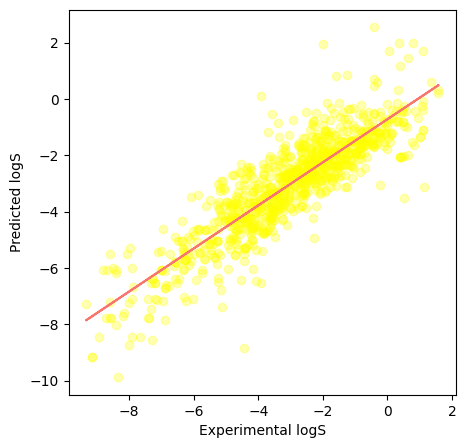

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_trainpred,alpha=0.3,color="yellow")
plt.plot()
z=np.polyfit(y_train,y_lr_trainpred,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),'#F8766D')
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")